# Packages

In [1]:
import os
import itertools
import numpy as np
import math as math
import pandas as pd 
import random as random
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon
from utils.Auxiliary import *

# Input


In [ ]:
DataType = "BreastCancer"
BaseDirectory = "/Users/simondn/Documents/RashomonActiveLearning/Results/"
RandomForesResults = LoadAnalyzedData(DataType, BaseDirectory, "RandomForestClassification", 0.0)
AnalyzedData009 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.009)
AnalyzedData011 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.011)
AnalyzedData013 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.013)
AnalyzedData015 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.015)
AnalyzedData017 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.017)
AnalyzedData019 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.019)
AnalyzedData021 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.021)
AnalyzedData023 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.023)
# AnalyzedData025 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.025)

# Shape

In [5]:
ShapeTable = {"DUREAL":[AnalyzedData009["Error_DUREAL"].shape[0],
                        AnalyzedData011["Error_DUREAL"].shape[0],
                        AnalyzedData013["Error_DUREAL"].shape[0],
                        AnalyzedData015["Error_DUREAL"].shape[0],
                        AnalyzedData017["Error_DUREAL"].shape[0],
                        AnalyzedData019["Error_DUREAL"].shape[0],
                        AnalyzedData021["Error_DUREAL"].shape[0],
                        AnalyzedData023["Error_DUREAL"].shape[0]],
                        # AnalyzedData025["Error_DUREAL"].shape[0]], 
              "UNREAL": [AnalyzedData009["Error_UNREAL"].shape[0], 
                            AnalyzedData011["Error_UNREAL"].shape[0], 
                            AnalyzedData013["Error_UNREAL"].shape[0], 
                            AnalyzedData015["Error_UNREAL"].shape[0], 
                            AnalyzedData017["Error_UNREAL"].shape[0], 
                            AnalyzedData019["Error_UNREAL"].shape[0], 
                            AnalyzedData021["Error_UNREAL"].shape[0], 
                            AnalyzedData023["Error_UNREAL"].shape[0]
                            # AnalyzedData025["Error_UNREAL"].shape[0]]
                            }
ShapeTable = pd.DataFrame(ShapeTable)
ShapeTable.index = range(9,25,2)
ShapeTable

,DUREAL,UNREAL
9,99,100
11,100,100
13,100,100
15,100,100
17,100,100
19,100,100
21,100,100
23,100,100
25,100,100


# Run Time

In [6]:
### Time ###
print("RF Time (minutes): " + "Mean: " + str(round(np.mean(RandomForesResults["Time_RF"])/60,2)) + "| Max: " + str(round(np.max(RandomForesResults["Time_RF"])/60,2)))
print("DUREAL 0.015 Time (minutes): " + "Mean: " + str(round(np.mean(AnalyzedData015["Time_DUREAL"])/60,2)) + "| Max: " + str(round(np.max(AnalyzedData015["Time_DUREAL"])/60,2)))
print("UNREAL 0.015 Time (minutes): " + "Mean: " + str(round(np.mean(AnalyzedData015["Time_UNREAL"])/60,2)) + "| Max: " + str(round(np.max(AnalyzedData015["Time_UNREAL"])/60,2)))
print("DUREAL 0.023 Time (minutes): " + "Mean: " + str(round(np.mean(AnalyzedData023["Time_DUREAL"])/60,2)) + "| Max: " + str(round(np.max(AnalyzedData023["Time_DUREAL"])/60,2)))
print("UNREAL 0.023 Time (minutes): " + "Mean: " + str(round(np.mean(AnalyzedData023["Time_UNREAL"])/60,2)) + "| Max: " + str(round(np.max(AnalyzedData023["Time_UNREAL"])/60,2)))

RF Time (minutes): Mean: 1.69| Max: 1.97
DUREAL 0.015 Time (minutes): Mean: 50.85| Max: 181.78
UNREAL 0.015 Time (minutes): Mean: 49.13| Max: 198.76
DUREAL 0.025 Time (minutes): Mean: 395.78| Max: 2464.96
UNREAL 0.025 Time (minutes): Mean: 385.5| Max: 2493.02


# Error Vec

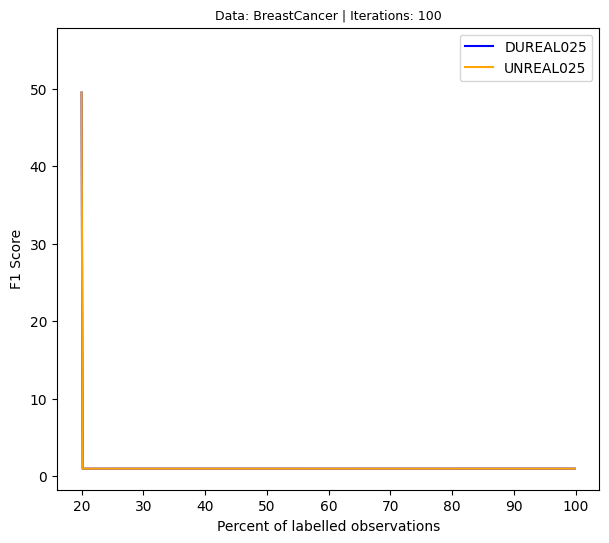

In [15]:
### Set Up ###
PlotSubtitle = f"Data: {DataType} | Iterations: {AnalyzedData015['Error_DUREAL'].shape[0]}"
colors = {
    "RandomForest": "green",
    "DUREAL009": "blue",
    "UNREAL009": "orange",
    "DUREAL025": "blue",
    "UNREAL025": "orange"
}

linestyles = {
    "RandomForest": "solid",
    "DUREAL009": "dashed",
    "UNREAL009": "dashed",
    "DUREAL025": "solid",
    "UNREAL025": "solid"
}

### Figure ##
MeanPlot = MeanVariancePlot(RelativeError = None,
                #  RandomForest = RandomForesResults["Error_RF"],
                #  DUREAL009 = AnalyzedData009["Error_DUREAL"],
                #  UNREAL009 = AnalyzedData009["Error_UNREAL"],
                #  DUREAL011 = AnalyzedData011["Error_DUREAL"],
                #  UNREAL011 = AnalyzedData011["Error_UNREAL"],
                #  DUREAL013 = AnalyzedData013["Error_DUREAL"],
                #  UNREAL013 = AnalyzedData013["Error_UNREAL"],
                #  DUREAL015 = AnalyzedData015["Error_DUREAL"],
                #  UNREAL015 = AnalyzedData015["Error_UNREAL"],
                #  DUREAL017 = AnalyzedData017["Error_DUREAL"],
                #  UNREAL017 = AnalyzedData017["Error_UNREAL"],
                #  DUREAL019 = AnalyzedData019["Error_DUREAL"],
                #  UNREAL019 = AnalyzedData019["Error_UNREAL"],
                #  DUREAL021 = AnalyzedData021["Error_DUREAL"],
                #  UNREAL021 = AnalyzedData021["Error_UNREAL"],
                 DUREAL023 = AnalyzedData023["Error_DUREAL"],
                 UNREAL023 = AnalyzedData023["Error_UNREAL"],
                #  DUREAL025 = AnalyzedData025["Error_DUREAL"],
                #  UNREAL025 = AnalyzedData025["Error_UNREAL"],
                 Colors = colors,
                 Linestyles=linestyles,
                # xlim = [20,30],
                Y_Label = "F1 Score",
                 Subtitle = PlotSubtitle,
                 TransparencyVal = 0.00,
                 VarInput = False,
                 CriticalValue = 1.96)

# Selection History

In [17]:
SelectionHistoryRank_RF = SelectionHistoryRankFunction(RandomForesResults["SelectionHistory_RF"], DataType = DataType)
SelectionHistoryRank_UNREAL23 = SelectionHistoryRankFunction(AnalyzedData023["SelectionHistory_UNREAL"], DataType = DataType)
SelectionHistoryRank_DUREAL23 = SelectionHistoryRankFunction(AnalyzedData023["SelectionHistory_DUREAL"], DataType = DataType)
SelectionHistoryRank_RF.sort_values(by = "AverageRank").head()
SelectionHistoryRank_UNREAL23.sort_values(by = "AverageRank").head()
SelectionHistoryRank_DUREAL23.sort_values(by = "AverageRank").head()

,AverageRank,ClumpThickness_10,CellSize_1,CellSize_10,CellShape_1,Adhesion_1,SingleEpithelialCellSize_2,BareNuclei_1,BareNuclei_10,NormalNucleoli_1,NormalNucleoli_10,Y
326,8.250000,1,1,0,1,1,1,0,1,0,0,1
6,8.600000,0,1,0,1,1,1,0,1,1,0,0
288,8.716418,0,1,0,0,1,0,0,0,0,1,1
590,8.968254,0,0,1,0,0,0,1,0,1,0,1
299,9.579710,0,1,0,0,0,0,0,1,0,0,1


# Tree Counts

## Set Up

In [18]:
AnalyzedDataSmall = AnalyzedData009
AnalyzedDataLarge = AnalyzedData023

In [19]:
UNREAL_Average_TreeCountsRatioSmall = np.mean(AnalyzedDataSmall["TreeCounts_UNIQUE_UNREAL"].div(AnalyzedDataSmall["TreeCounts_ALL_UNREAL"]), axis = 0)
DUREAL_Average_TreeCountsRatioSmall = np.mean(AnalyzedDataSmall["TreeCounts_UNIQUE_DUREAL"].div(AnalyzedDataSmall["TreeCounts_ALL_DUREAL"]), axis = 0)
AverageTreeCountRatioSmall = pd.DataFrame(np.column_stack((UNREAL_Average_TreeCountsRatioSmall, 
                              DUREAL_Average_TreeCountsRatioSmall,
                              np.round(UNREAL_Average_TreeCountsRatioSmall - DUREAL_Average_TreeCountsRatioSmall,5))), 
                             columns = ["UNREAL", "DUREAL", "Difference"])

UNREAL_Average_TreeCountsRatioLarge = np.mean(AnalyzedDataLarge["TreeCounts_UNIQUE_UNREAL"].div(AnalyzedDataLarge["TreeCounts_ALL_UNREAL"]), axis = 0)
DUREAL_Average_TreeCountsRatioLarge = np.mean(AnalyzedDataLarge["TreeCounts_UNIQUE_DUREAL"].div(AnalyzedDataLarge["TreeCounts_ALL_DUREAL"]), axis = 0)
AverageTreeCountRatioLarge = pd.DataFrame(np.column_stack((UNREAL_Average_TreeCountsRatioLarge, 
                              DUREAL_Average_TreeCountsRatioLarge,
                              np.round(UNREAL_Average_TreeCountsRatioLarge - DUREAL_Average_TreeCountsRatioLarge,5))), 
                             columns = ["UNREAL", "DUREAL", "Difference"])

## Number of All Trees

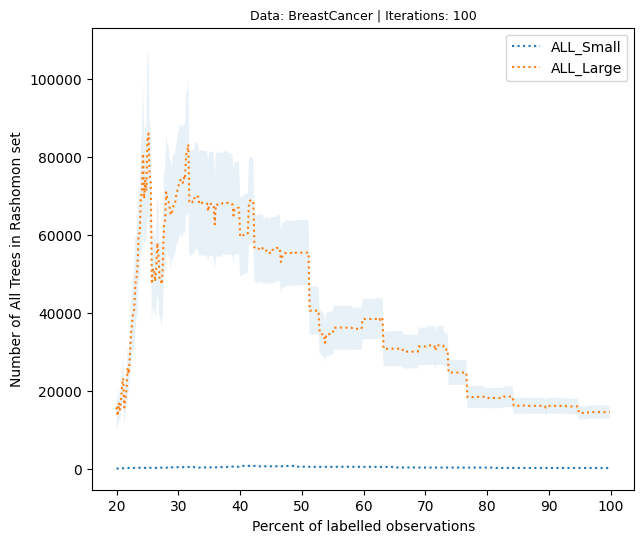

In [20]:
TreePlot = MeanVariancePlot(RelativeError = None,
                #  Unique_Small = AnalyzedDataSmall["TreeCounts_UNIQUE_UNREAL"],
                 ALL_Small = AnalyzedDataSmall["TreeCounts_ALL_UNREAL"],
                #  Unique_Large = AnalyzedDataLarge["TreeCounts_UNIQUE_UNREAL"],
                 ALL_Large = AnalyzedDataLarge["TreeCounts_ALL_UNREAL"],
                #  RatioSmall = AverageTreeCountRatioSmall,
                #  RatioLarge = AverageTreeCountRatioLarge,
                #  Colors = colors,
                #  Linestyles=linestyles,
                # xlim = [20,50],
                Y_Label = "Number of All Trees in Rashomon set",
                VarInput = False,
                 Subtitle = PlotSubtitle,
                 TransparencyVal = 0.1,
                 CriticalValue = 1.96)

## Number of Unique Trees

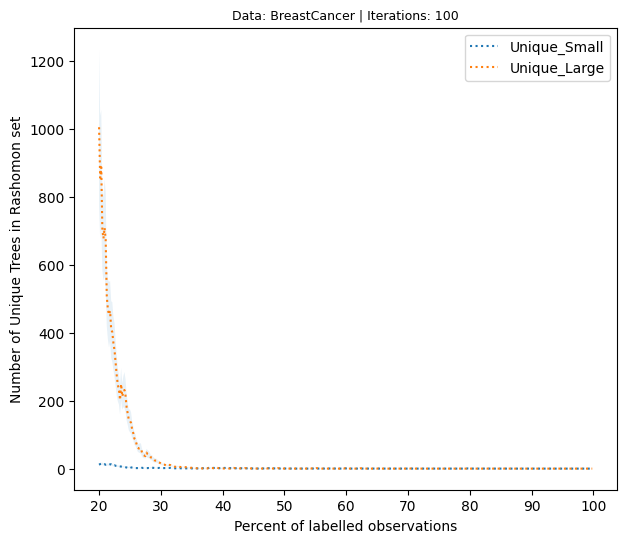

In [21]:
TreePlot = MeanVariancePlot(RelativeError = None,
                 Unique_Small = AnalyzedDataSmall["TreeCounts_UNIQUE_UNREAL"],
                #  ALL_Small = AnalyzedDataSmall["TreeCounts_ALL_UNREAL"],
                 Unique_Large = AnalyzedDataLarge["TreeCounts_UNIQUE_UNREAL"],
                #  ALL_Large = AnalyzedDataLarge["TreeCounts_ALL_UNREAL"],
                #  RatioSmall = AverageTreeCountRatioSmall,
                #  RatioLarge = AverageTreeCountRatioLarge,
                #  Colors = colors,
                #  Linestyles=linestyles,
                # xlim = [20,50],
                Y_Label = "Number of Unique Trees in Rashomon set",
                VarInput = False,
                 Subtitle = PlotSubtitle,
                 TransparencyVal = 0.1,
                 CriticalValue = 1.96)